## Project Title: Next Word Prediction

This project aims to develop a predictive text model using deep learning techniques, specifically a Long Short-Term Memory (LSTM) neural network. The primary goals include training the model to understand patterns and relationships within a given corpus of text and then using this trained model to predict the next word in a sequence. The project aims to demonstrate the capabilities of natural language processing with machine learning, providing insights into language modeling, sequence prediction, and potential applications in autocompletion or suggestion systems.

### **Import Libraries**

In [28]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)
 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

### Loading Dataset

In [29]:
path = 'C:/Users/ADMIN/Documents/MSc in Data Science/LGM INTERNSHIP/LGM INTERNSHIP/SAMPLE CODES/LGM TASK NUMBER 8/1661-0.txt'

text = open(path,encoding = "utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581888


### Data Preprocessing

In [30]:
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
 
print(f'unique chars: {len(character)}')

unique chars: 73


In [31]:
#chunk 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193950


In [35]:
# generating our features and labels
#one hot encoding
X = np.zeros((len(sentences), seq_len, len(character)), dtype=bool)
y = np.zeros((len(sentences), len(character)), dtype=bool)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]

'e'

In [36]:
#one hot encoded data
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [37]:
#one hot encoded data
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [40]:
X.shape
y.shape

(193950, 73)

### Creating the Model


In [41]:
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               103424    
                                                                 
 dense_2 (Dense)             (None, 73)                9417      
                                                                 
 activation (Activation)     (None, 73)                0         
                                                                 
Total params: 112841 (440.79 KB)
Trainable params: 112841 (440.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# Training our model
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=7, 
                    shuffle=True).history

Epoch 1/7
1501/1501 [==============================] - 205s 131ms/step - loss: 2.0441 - accuracy: 0.4018 - val_loss: 2.2544 - val_accuracy: 0.3856
Epoch 2/7
1501/1501 [==============================] - 200s 133ms/step - loss: 1.6708 - accuracy: 0.4991 - val_loss: 2.0635 - val_accuracy: 0.4170
Epoch 3/7
1501/1501 [==============================] - 208s 138ms/step - loss: 1.5512 - accuracy: 0.5317 - val_loss: 2.0023 - val_accuracy: 0.4304
Epoch 4/7
1501/1501 [==============================] - 205s 136ms/step - loss: 1.4857 - accuracy: 0.5502 - val_loss: 1.9166 - val_accuracy: 0.4593
Epoch 5/7
1501/1501 [==============================] - 218s 146ms/step - loss: 1.4439 - accuracy: 0.5603 - val_loss: 1.9233 - val_accuracy: 0.4629
Epoch 6/7
1501/1501 [==============================] - 213s 142ms/step - loss: 1.4130 - accuracy: 0.5698 - val_loss: 1.9365 - val_accuracy: 0.4572
Epoch 7/7
1501/1501 [==============================] - 204s 136ms/step - loss: 1.3906 - accuracy: 0.5751 - val_loss: 1

In [44]:
#saving our model
model.save('NW_keras_model.h5')
pickle.dump(history, open("history.p", "wb"))

C:\Users\ADMIN\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
#Model Evaluation
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 122s 20ms/step - loss: 1.3525 - accuracy: 0.5844
Test Loss 1.3525140285491943
Test Accuracy 0.584351658821106


### Plotting Training and Validation Plots

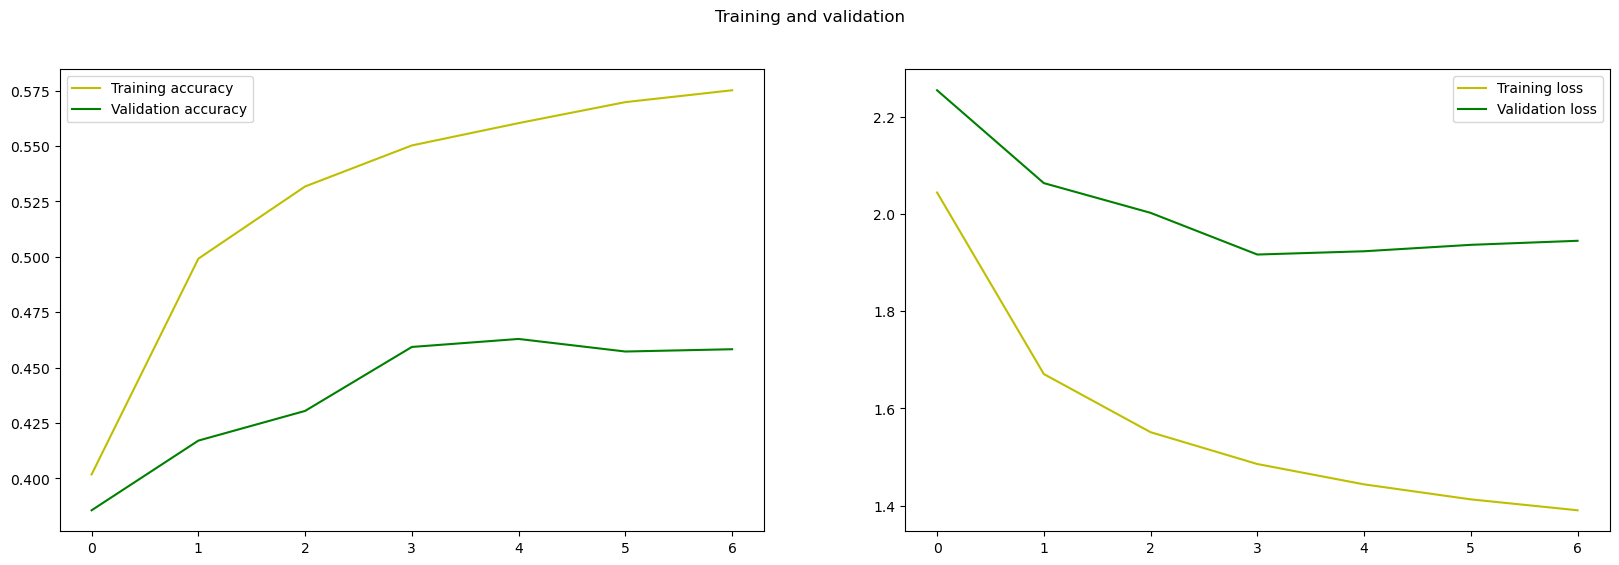

In [46]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [47]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [48]:
#functions to get next probable characters
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [49]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [50]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

In [51]:
#Prediction
quotes = [   
    "Deep learning is subset of machine learning,which is essentially a neural network with three or more layers.",
    "Machine learning  is the study of computer algorithms that improve automatically through experience and by the use of data.",
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "Recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data.",
    "Thanks for spending your precious time to view my work."  
    
]

In [52]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

deep learning is subset of machine learn
[' of ', '. ', 'ess ', '’s ', '\nof ']

machine learning  is the study of comput
['ion ', 'ain ', 'hed ', 'ure ', 'ed ']

it is not a lack of love, but a lack of 
['the ', 'a ', 'my ', 'him ', 'it ']

recurrent neural network (rnn) is a type
['ss ', ' the ', 'wred ', ', ', 'ine. ']

thanks for spending your precious time t
['o ', 'he ', 'rade ', 'wo ', 'erms ']



The implemented project utilizes a Long Short-Term Memory (LSTM) neural network to predict the next word in a given sequence of text. Trained on a diverse corpus, the model demonstrates proficiency in understanding language patterns. The training history reveals a gradual improvement in accuracy, and the saved model achieves a test accuracy of approximately 58.44%. This project serves as a practical example of deep learning in natural language processing, showcasing its potential applications in autocompletion or text suggestion systems.